In [1]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import lifelines
import matplotlib.pyplot as plt
import seaborn as sns


# Import and tidy data
%run tidy_data.py

# Risk evaluation
%run scripts.py

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 173
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 173 non-null    object  
 1   age                173 non-null    int64   
 2   variant_histology  173 non-null    category
 3   ypT_stage          173 non-null    category
 4   ypN_stage          173 non-null    category
 5   recurrence         172 non-null    category
 6   fu_recurrence      173 non-null    int64   
 7   dod                170 non-null    category
 8   doc                169 non-null    category
 9   fu_censor          173 non-null    int64   
 10  sex                173 non-null    object  
 11  year_cystectomy    173 non-null    float64 
 12  ypT_group1         173 non-null    category
 13  ypT_group2         173 non-null    category
 14  ypN_group1         173 non-null    category
 15  ypN_group2         173 non-null    category
 16  dre     

# OR - Tumor recurrence

In [2]:
# Copy full dataframe and drop NAN values
df_recurrence = df.dropna(subset=['recurrence']).copy()

In [3]:
# Create dummy variables for predictors and outcome
df_recurrence = pd.get_dummies(df_recurrence, columns=['sex','variant_histology','ypT_group1','ypN_group1','recurrence'], drop_first=True)

# sex: Female vs Male
# variant_histology: No vs Yes
# ypT: pT0-pTis-pTa vs pT2-pT3
# ypN: pN0 vs pN1-pN2-pN3
df_recurrence = df_recurrence.rename(columns={'ypT_group1_pT2-pT3':'ypT','ypN_group1_pN1-pN2-pN3':'ypN','sex_Male':'sex','variant_histology_Yes':'variant_histology','recurrence_Yes':'recurrence'})
df_recurrence = df_recurrence[['age','sex','variant_histology','ypT','ypN','recurrence','fu_recurrence']]
df_recurrence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                172 non-null    int64
 1   sex                172 non-null    uint8
 2   variant_histology  172 non-null    uint8
 3   ypT                172 non-null    uint8
 4   ypN                172 non-null    uint8
 5   recurrence         172 non-null    uint8
 6   fu_recurrence      172 non-null    int64
dtypes: int64(2), uint8(5)
memory usage: 4.9 KB


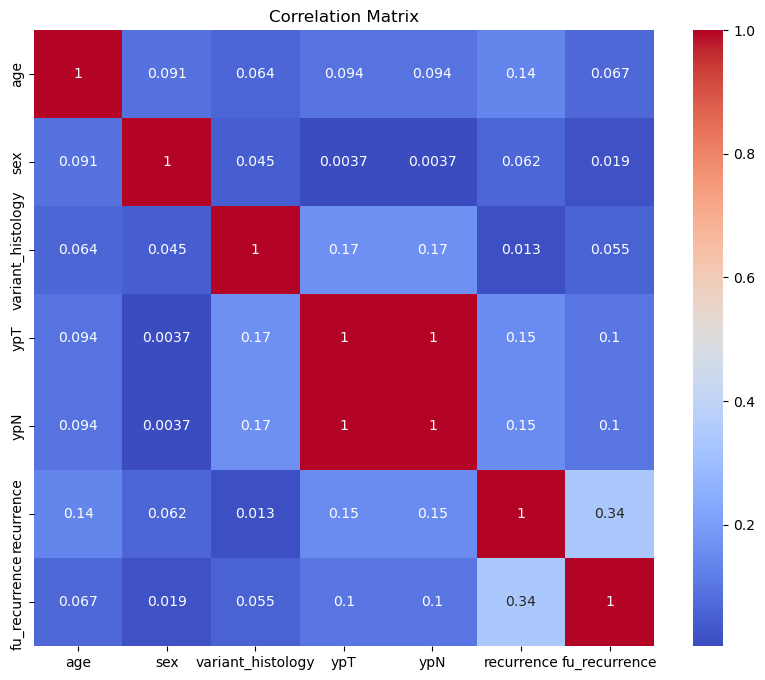

,age,sex,variant_histology,ypT,ypN,recurrence,fu_recurrence
age,1.000000,0.091500,0.064465,0.094082,0.094082,0.136665,0.067003
sex,0.091500,1.000000,0.044807,0.003738,0.003738,0.062273,0.019288
variant_histology,0.064465,0.044807,1.000000,0.165250,0.165250,0.012577,0.054583
ypT,0.094082,0.003738,0.165250,1.000000,1.000000,0.153601,0.100407
ypN,0.094082,0.003738,0.165250,1.000000,1.000000,0.153601,0.100407
recurrence,0.136665,0.062273,0.012577,0.153601,0.153601,1.000000,0.340426
fu_recurrence,0.067003,0.019288,0.054583,0.100407,0.100407,0.340426,1.000000


In [4]:
# Correlation matrix
correlation_matrix = df_recurrence.corr().abs()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

In [5]:
# age
logistic_regression(df_recurrence, 'age', 'recurrence')

Optimization terminated successfully.
         Current function value: 133.398077
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.970979,0.939787,1.003207,0.077102


In [6]:
# sex
logistic_regression(df_recurrence, 'sex', 'recurrence')

Optimization terminated successfully.
         Current function value: 127.195634
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
sex,1.35,0.656123,2.77768,0.414943


In [7]:
# variant_histology
logistic_regression(df_recurrence, 'variant_histology', 'recurrence')

Optimization terminated successfully.
         Current function value: 125.667021
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
variant_histology,1.057143,0.546196,2.046061,0.868994


In [8]:
# ypT
logistic_regression(df_recurrence, 'ypT', 'recurrence')

Optimization terminated successfully.
         Current function value: 133.694530
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
ypT,0.459184,0.213184,0.98905,0.046802


In [9]:
# ypN
logistic_regression(df_recurrence, 'ypN', 'recurrence')

Optimization terminated successfully.
         Current function value: 133.694530
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
ypN,2.177778,1.011072,4.690782,0.046802


In [10]:
# Adjusted OR - Multivariate 1
logistic_regression(df_recurrence, ['age','sex','variant_histology','ypT'], 'recurrence')

Optimization terminated successfully.
         Current function value: 142.258895
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.974564,0.942731,1.007472,0.128358
sex,1.321039,0.629896,2.770529,0.461242
variant_histology,1.167575,0.585654,2.327708,0.659859
ypT,0.464182,0.210154,1.025271,0.057665


In [11]:
# Adjusted OR - Multivariate 2
logistic_regression(df_recurrence, ['age','sex','variant_histology','ypN'], 'recurrence')

Optimization terminated successfully.
         Current function value: 142.258895
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.974564,0.942731,1.007472,0.128358
sex,1.321039,0.629896,2.770529,0.461242
variant_histology,1.167575,0.585654,2.327708,0.659859
ypN,2.154328,0.975352,4.758415,0.057665


# HR - Tumor recurrence

In [12]:
# age
cox_regression(df_recurrence, 'fu_recurrence', 'age', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.967888,0.941325,0.9952,0.021515


In [13]:
# sex
cox_regression(df_recurrence, 'fu_recurrence', 'sex', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
sex,1.245057,0.679795,2.280343,0.477772


In [14]:
# variant_histology
cox_regression(df_recurrence, 'fu_recurrence', 'variant_histology', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
variant_histology,1.05641,0.614928,1.814849,0.842448


In [15]:
# ypT
cox_regression(df_recurrence, 'fu_recurrence', 'ypT', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypT,0.693034,0.387816,1.238463,0.215745


In [16]:
# ypN
cox_regression(df_recurrence, 'fu_recurrence', 'ypN', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypN,1.442931,0.807453,2.578541,0.215745


In [17]:
# Adjusted HR - Multivariate 1
cox_regression(df_recurrence, 'fu_recurrence', 'age + sex + variant_histology + ypT', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.969177,0.941448,0.997723,0.034523
sex,1.292371,0.696836,2.396868,0.415743
variant_histology,1.174139,0.667586,2.065054,0.577348
ypT,0.754851,0.412522,1.381259,0.361636


In [18]:
# Adjusted HR - Multivarate 2
cox_regression(df_recurrence, 'fu_recurrence', 'age + sex + variant_histology + ypN', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.969177,0.941448,0.997723,0.034523
sex,1.292371,0.696836,2.396868,0.415743
variant_histology,1.174139,0.667586,2.065054,0.577348
ypN,1.324765,0.723977,2.424111,0.361636


# OR - Death by cancer

In [19]:
df_dod = df.dropna(subset=['dod']).copy()

In [20]:
# Create dummy variables for predictors and outcome
df_dod = pd.get_dummies(df_dod, columns=['sex','variant_histology','ypT_group1','ypN_group1','dod'], drop_first=True)

# sex: Female vs Male
# variant_histology: No vs Yes
# ypT: pT0-pTis-pTa vs pT2-pT3
# ypN: pN0 vs pN1-pN2-pN3
df_dod = df_dod.rename(columns={'ypT_group1_pT2-pT3':'ypT','ypN_group1_pN1-pN2-pN3':'ypN','sex_Male':'sex','variant_histology_Yes':'variant_histology','dod_Yes':'dod'})
df_dod = df_dod[['age','sex','variant_histology','ypT','ypN','dod','fu_censor']]
df_dod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                170 non-null    int64
 1   sex                170 non-null    uint8
 2   variant_histology  170 non-null    uint8
 3   ypT                170 non-null    uint8
 4   ypN                170 non-null    uint8
 5   dod                170 non-null    uint8
 6   fu_censor          170 non-null    int64
dtypes: int64(2), uint8(5)
memory usage: 4.8 KB


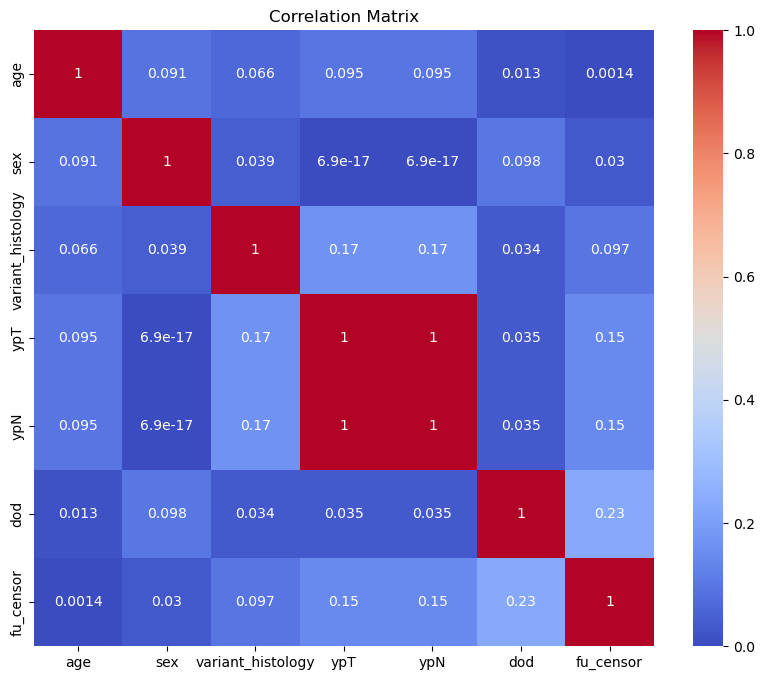

,age,sex,variant_histology,ypT,ypN,dod,fu_censor
age,1.000000,9.099585e-02,0.065559,9.479233e-02,9.479233e-02,0.013434,0.001367
sex,0.090996,1.000000e+00,0.039310,6.852926e-17,6.875321e-17,0.098466,0.030008
variant_histology,0.065559,3.930993e-02,1.000000,1.705163e-01,1.705163e-01,0.033781,0.096981
ypT,0.094792,6.852926e-17,0.170516,1.000000e+00,1.000000e+00,0.034669,0.145223
ypN,0.094792,6.875321e-17,0.170516,1.000000e+00,1.000000e+00,0.034669,0.145223
dod,0.013434,9.846580e-02,0.033781,3.466876e-02,3.466876e-02,1.000000,0.230660
fu_censor,0.001367,3.000800e-02,0.096981,1.452233e-01,1.452233e-01,0.230660,1.000000


In [21]:
# Correlation matrix
correlation_matrix = df_dod.corr().abs()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
df_dod.corr().abs()

In [22]:
# age
logistic_regression(df_dod, 'age', 'dod')

Optimization terminated successfully.
         Current function value: 230.275054
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.996822,0.961938,1.032971,0.860974


In [23]:
# sex
logistic_regression(df_dod, 'sex', 'dod')

Optimization terminated successfully.
         Current function value: 235.057701
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
sex,0.614035,0.290544,1.2977,0.201458


In [24]:
# variant_histology
logistic_regression(df_dod, 'variant_histology', 'dod')

Optimization terminated successfully.
         Current function value: 230.785874
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
variant_histology,1.177305,0.5692,2.43508,0.659787


In [25]:
# ypT
logistic_regression(df_dod, 'ypT', 'dod')

Optimization terminated successfully.
         Current function value: 230.797698
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
ypT,0.820106,0.346757,1.939608,0.651588


In [26]:
# ypN
logistic_regression(df_dod, 'ypN', 'dod')

Optimization terminated successfully.
         Current function value: 230.797698
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
ypN,1.219355,0.515568,2.883861,0.651588


In [27]:
# Adjusted OR - Multivariate 1
logistic_regression(df_dod, ['age','sex','variant_histology','ypT'], 'dod')

Optimization terminated successfully.
         Current function value: 236.496961
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.996223,0.961225,1.032494,0.835686
sex,0.613682,0.288821,1.303939,0.204156
variant_histology,1.186541,0.562665,2.502164,0.653208
ypT,0.797982,0.329616,1.931871,0.616896


In [28]:
# Adjusted OR - Multivariate 2
logistic_regression(df_dod, ['age','sex','variant_histology','ypN'], 'dod')

Optimization terminated successfully.
         Current function value: 236.496961
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.996223,0.961225,1.032494,0.835686
sex,0.613682,0.288821,1.303939,0.204156
variant_histology,1.186541,0.562665,2.502164,0.653208
ypN,1.253162,0.517633,3.033838,0.616896


# HR - Death by cancer

In [29]:
# age
cox_regression(df_dod, 'fu_censor', 'age', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.993368,0.958674,1.029317,0.713714


In [30]:
# sex
cox_regression(df_dod, 'fu_censor', 'sex', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
sex,0.655333,0.345216,1.244039,0.196269


In [31]:
# variant_histology
cox_regression(df_dod, 'fu_censor', 'variant_histology', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
variant_histology,1.242856,0.659512,2.342172,0.501287


In [32]:
# ypT
cox_regression(df_dod, 'fu_censor', 'ypT', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypT,1.022675,0.486532,2.149632,0.952828


In [33]:
# ypN
cox_regression(df_dod, 'fu_censor', 'ypN', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypN,0.977828,0.465196,2.055365,0.952828


In [34]:
# Adjusted HR - Multivariate 1
cox_regression(df_dod, 'fu_censor', 'age + sex + variant_histology + ypT', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.991795,0.957379,1.027449,0.647527
sex,0.663802,0.347049,1.269656,0.215560
variant_histology,1.185541,0.619702,2.268037,0.607096
ypT,0.999888,0.466328,2.143931,0.999770


In [35]:
# Adjusted HR - Multivariate 2
cox_regression(df_dod, 'fu_censor', 'age + sex + variant_histology + ypN', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.991795,0.957379,1.027449,0.647527
sex,0.663802,0.347049,1.269656,0.215560
variant_histology,1.185541,0.619702,2.268037,0.607096
ypN,1.000112,0.466433,2.144413,0.999770


# OR - Death by other causes

In [36]:
# Copy dataset and drop NANs values
df_doc = df.dropna(subset=['recurrence']).copy()

In [37]:
# Create dummy variables for predictors and outcome
df_doc = pd.get_dummies(df_doc, columns=['sex','variant_histology','ypT_group1','ypN_group1','doc'], drop_first=True)

# sex: Female vs Male
# variant_histology: No vs Yes
# ypT: pT0-pTis-pTa vs pT2-pT3
# ypN: pN0 vs pN1-pN2-pN3
df_doc = df_doc.rename(columns={'ypT_group1_pT2-pT3':'ypT','ypN_group1_pN1-pN2-pN3':'ypN','sex_Male':'sex','variant_histology_Yes':'variant_histology','doc_Yes':'doc'})
df_doc = df_doc[['age','sex','variant_histology','ypT','ypN','doc','fu_censor']]
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                172 non-null    int64
 1   sex                172 non-null    uint8
 2   variant_histology  172 non-null    uint8
 3   ypT                172 non-null    uint8
 4   ypN                172 non-null    uint8
 5   doc                172 non-null    uint8
 6   fu_censor          172 non-null    int64
dtypes: int64(2), uint8(5)
memory usage: 4.9 KB


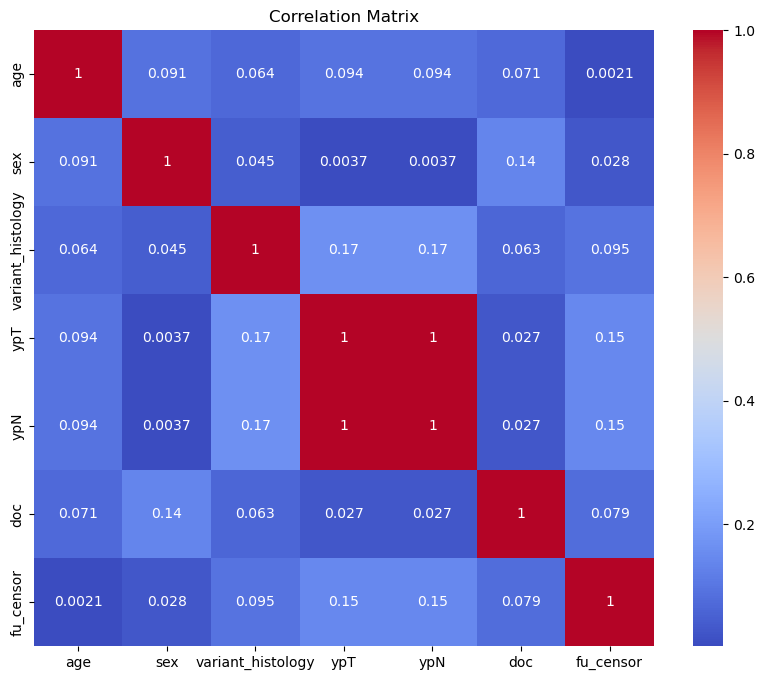

,age,sex,variant_histology,ypT,ypN,doc,fu_censor
age,1.000000,0.091500,0.064465,0.094082,0.094082,0.071099,0.002072
sex,0.091500,1.000000,0.044807,0.003738,0.003738,0.135211,0.028447
variant_histology,0.064465,0.044807,1.000000,0.165250,0.165250,0.062802,0.094611
ypT,0.094082,0.003738,0.165250,1.000000,1.000000,0.026619,0.145417
ypN,0.094082,0.003738,0.165250,1.000000,1.000000,0.026619,0.145417
doc,0.071099,0.135211,0.062802,0.026619,0.026619,1.000000,0.079109
fu_censor,0.002072,0.028447,0.094611,0.145417,0.145417,0.079109,1.000000


In [38]:
# Correlation matrix
correlation_matrix = df_doc.corr().abs()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

In [39]:
# age
logistic_regression(df_doc, 'age', 'doc')

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Odds Ratio,Lower CI,Upper CI,P-value
age,1.025515,0.972541,1.081375,0.351823


In [40]:
# sex
logistic_regression(df_doc, 'sex', 'doc')

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Odds Ratio,Lower CI,Upper CI,P-value
sex,3.622642,0.801076,16.382387,0.094548


In [41]:
# variant_histology
logistic_regression(df_doc, 'variant_histology', 'doc')

Optimization terminated successfully.
         Current function value: 495.557910
         Iterations 6


,Odds Ratio,Lower CI,Upper CI,P-value
variant_histology,0.636605,0.215825,1.877753,0.41319


In [42]:
# ypT
logistic_regression(df_doc, 'ypT', 'doc')

Optimization terminated successfully.
         Current function value: 491.266731
         Iterations 6


,Odds Ratio,Lower CI,Upper CI,P-value
ypT,1.260163,0.343206,4.626993,0.727499


In [43]:
# ypN
logistic_regression(df_doc, 'ypN', 'doc')

Optimization terminated successfully.
         Current function value: 491.266731
         Iterations 6


,Odds Ratio,Lower CI,Upper CI,P-value
ypN,0.793548,0.216123,2.913705,0.727499


In [44]:
# Adjusted OR - Multivariate 1
logistic_regression(df_doc, ['age','sex','variant_histology','ypT'], 'doc')

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Odds Ratio,Lower CI,Upper CI,P-value
age,1.033350,0.974364,1.095907,0.273974
sex,3.978742,0.858453,18.440607,0.077579
variant_histology,0.639414,0.209890,1.947925,0.431382
ypT,1.270803,0.329088,4.907315,0.728103


In [45]:
# Adjusted OR - Multivariate 2
logistic_regression(df_doc, ['age','sex','variant_histology','ypN'], 'doc')

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Odds Ratio,Lower CI,Upper CI,P-value
age,1.033350,0.974364,1.095907,0.273974
sex,3.978742,0.858453,18.440607,0.077579
variant_histology,0.639414,0.209890,1.947925,0.431382
ypN,0.786904,0.203777,3.038698,0.728103


# HR - Death by other causes

In [46]:
# age
cox_regression(df_doc, 'fu_censor', 'age', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,1.029962,0.973864,1.089292,0.30153


In [47]:
# sex
cox_regression(df_doc, 'fu_censor', 'sex', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
sex,3.223149,0.740656,14.026323,0.118798


In [48]:
# variant_histology
cox_regression(df_doc, 'fu_censor', 'variant_histology', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
variant_histology,0.790112,0.278829,2.238924,0.65755


In [49]:
# ypT
cox_regression(df_doc, 'fu_censor', 'ypT', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypT,1.719456,0.488513,6.052106,0.398568


In [50]:
# ypN
cox_regression(df_doc, 'fu_censor', 'ypN', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypN,0.581579,0.165232,2.04703,0.398568


In [51]:
# Adjusted HR - Multivariate 1
cox_regression(df_doc, 'fu_censor', 'age + sex + variant_histology + ypT', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,1.033559,0.974736,1.095932,0.269564
sex,3.461540,0.787915,15.207554,0.100111
variant_histology,0.774534,0.267058,2.246341,0.638151
ypT,1.826057,0.498352,6.691028,0.363442


In [52]:
# Adjusted HR - Multivariate 2
cox_regression(df_doc, 'fu_censor', 'age + sex + variant_histology + ypN', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,1.033559,0.974736,1.095932,0.269564
sex,3.461540,0.787915,15.207554,0.100111
variant_histology,0.774534,0.267058,2.246341,0.638151
ypN,0.547628,0.149454,2.006615,0.363442


# OR - Disease-related event

In [53]:
df_dre = df.dropna(subset=['dre']).copy()

In [54]:
# Create dummy variables for predictors and outcome
df_dre = pd.get_dummies(df_dre, columns=['sex','variant_histology','ypT_group1','ypN_group1','dre'], drop_first=True)

# sex: Female vs Male
# variant_histology: No vs Yes
# ypT: pT0-pTis-pTa vs pT2-pT3
# ypN: pN0 vs pN1-pN2-pN3
df_dre = df_dre.rename(columns={'ypT_group1_pT2-pT3':'ypT','ypN_group1_pN1-pN2-pN3':'ypN','sex_Male':'sex','variant_histology_Yes':'variant_histology','dre_Yes':'dre'})
df_dre = df_dre[['age','sex','variant_histology','ypT','ypN','dre','fu_censor']]
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                172 non-null    int64
 1   sex                172 non-null    uint8
 2   variant_histology  172 non-null    uint8
 3   ypT                172 non-null    uint8
 4   ypN                172 non-null    uint8
 5   doc                172 non-null    uint8
 6   fu_censor          172 non-null    int64
dtypes: int64(2), uint8(5)
memory usage: 8.9 KB


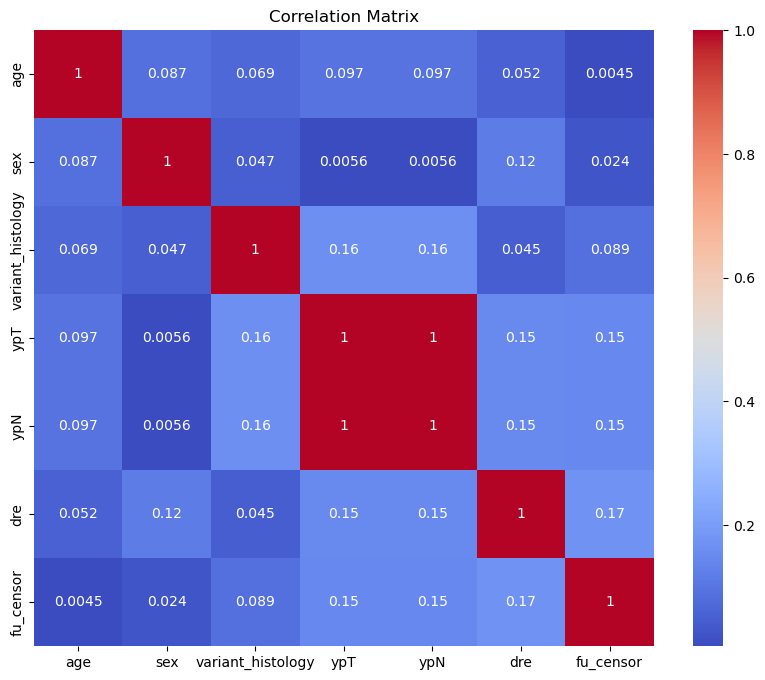

,age,sex,variant_histology,ypT,ypN,dre,fu_censor
age,1.000000,0.087141,0.068831,0.096768,0.096768,0.051953,0.004533
sex,0.087141,1.000000,0.047485,0.005565,0.005565,0.117176,0.024374
variant_histology,0.068831,0.047485,1.000000,0.162681,0.162681,0.045312,0.089458
ypT,0.096768,0.005565,0.162681,1.000000,1.000000,0.149224,0.147895
ypN,0.096768,0.005565,0.162681,1.000000,1.000000,0.149224,0.147895
dre,0.051953,0.117176,0.045312,0.149224,0.149224,1.000000,0.173342
fu_censor,0.004533,0.024374,0.089458,0.147895,0.147895,0.173342,1.000000


In [55]:
# Correlation matrix
correlation_matrix = df_dre.corr().abs()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

In [56]:
# age
logistic_regression(df_dre, 'age', 'dre')

Optimization terminated successfully.
         Current function value: 55.796243
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.989356,0.959396,1.020252,0.495198


In [57]:
# sex
logistic_regression(df_dre, 'sex', 'dre')

Optimization terminated successfully.
         Current function value: 59.403500
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
sex,1.71875,0.860021,3.434918,0.125252


In [58]:
# variant_histology
logistic_regression(df_dre, 'variant_histology', 'dre')

Optimization terminated successfully.
         Current function value: 55.481740
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
variant_histology,0.824877,0.437807,1.554163,0.551394


In [59]:
# ypT
logistic_regression(df_dre, 'ypT', 'dre')

Optimization terminated successfully.
         Current function value: 66.358464
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
ypT,0.471869,0.220865,1.008129,0.052494


In [60]:
# ypN
logistic_regression(df_dre, 'ypN', 'dre')

Optimization terminated successfully.
         Current function value: 66.358464
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
ypN,2.119231,0.991936,4.527649,0.052494


In [61]:
# Adjusted OR - Multivariate 1
logistic_regression(df_dre, ['age','sex','variant_histology','ypT'], 'dre')

Optimization terminated successfully.
         Current function value: 71.164045
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.993749,0.962659,1.025844,0.699029
sex,1.720084,0.850284,3.479649,0.131352
variant_histology,0.924648,0.480371,1.779821,0.814616
ypT,0.478856,0.219231,1.045942,0.064707


In [62]:
# Adjusted OR - Multivariate 2
logistic_regression(df_dre, ['age','sex','variant_histology','ypN'], 'dre')

Optimization terminated successfully.
         Current function value: 71.164045
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.993749,0.962659,1.025844,0.699029
sex,1.720084,0.850284,3.479649,0.131352
variant_histology,0.924648,0.480371,1.779821,0.814616
ypN,2.088310,0.956076,4.561393,0.064707


# HR - Disease-related event

In [63]:
# age
cox_regression(df_dre, 'fu_censor', 'age', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.990692,0.96398,1.018144,0.502505


In [64]:
# sex
cox_regression(df_dre, 'fu_censor', 'sex', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
sex,1.309249,0.74979,2.286151,0.343413


In [65]:
# variant_histology
cox_regression(df_dre, 'fu_censor', 'variant_histology', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
variant_histology,1.039809,0.633775,1.70597,0.877187


In [66]:
# ypT
cox_regression(df_dre, 'fu_censor', 'ypT', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypT,0.88081,0.517125,1.500269,0.640445


In [67]:
# ypN
cox_regression(df_dre, 'fu_censor', 'ypN', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypN,1.135318,0.666547,1.933768,0.640445


In [68]:
# Adjusted HR - Multivariate 1
cox_regression(df_dre, 'fu_censor', 'age + sex + variant_histology + ypT', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.992027,0.964708,1.020121,0.574252
sex,1.311070,0.744918,2.307508,0.347728
variant_histology,1.115230,0.665750,1.868176,0.678631
ypT,0.890985,0.513052,1.547315,0.681892


In [69]:
# Adjusted HR - Multivariate 2
cox_regression(df_dre, 'fu_censor', 'age + sex + variant_histology + ypN', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.992027,0.964708,1.020121,0.574252
sex,1.311070,0.744918,2.307508,0.347728
variant_histology,1.115230,0.665750,1.868176,0.678631
ypN,1.122354,0.646281,1.949119,0.681892
